In [4]:
%matplotlib inline

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier

## Inspecting data

In [6]:
seed = 12

df = pd.read_stata('../data/HCMST 2017 fresh sample for public sharing draft v1.1.dta')
df.head()

,CaseID,CASEID_NEW,qflag,weight1,weight1_freqwt,weight2,weight1a,weight1a_freqwt,weight_combo,weight_combo_freqwt,...,hcm2017q24_met_through_family,hcm2017q24_met_through_friend,hcm2017q24_met_through_as_nghbrs,hcm2017q24_met_as_through_cowork,w6_subject_race,interracial_5cat,partner_mother_yrsed,subject_mother_yrsed,partner_yrsed,subject_yrsed
0,2,2014039,Qualified,NaN,NaN,0.8945,NaN,NaN,0.277188,19240.0,...,no,no,no,no,White,no,12.0,14.0,12.0,14.0
1,3,2019003,Qualified,0.9078,71115.0,NaN,0.9026,70707.0,1.020621,70841.0,...,no,no,no,yes,White,no,12.0,16.0,17.0,17.0
2,5,2145527,Qualified,0.7205,56442.0,NaN,0.7164,56121.0,0.810074,56227.0,...,no,no,no,no,White,no,9.0,7.5,14.0,17.0
3,6,2648857,Qualified,1.2597,98682.0,1.3507,1.2524,98110.0,0.418556,29052.0,...,no,no,no,no,White,no,16.0,12.0,12.0,12.0
4,7,2623465,Qualified,0.8686,68044.0,NaN,0.8636,67652.0,0.976522,67781.0,...,no,no,yes,no,White,no,14.0,17.0,16.0,16.0


In [7]:
df.describe()

,CaseID,CASEID_NEW,weight1,weight1_freqwt,weight2,weight1a,weight1a_freqwt,weight_combo,weight_combo_freqwt,duration,...,age_when_met,time_from_met_to_rel,year_fraction_first_cohab,time_from_rel_to_cohab,hcm2017_q24_length,hcm2017q24_summary_all_codes,partner_mother_yrsed,subject_mother_yrsed,partner_yrsed,subject_yrsed
count,3510.000000,3.510000e+03,2994.000000,2994.000000,551.000000,3110.000000,3110.000000,3510.000000,3510.000000,3510.000000,...,3341.000000,3263.000000,2630.000000,2578.000000,3394.000000,3295.000000,3323.000000,3378.000000,3383.000000,3510.000000
mean,2121.318803,2.181073e+06,0.999999,78337.460938,1.000003,1.000001,78337.601562,1.000000,69410.132812,267.449858,...,26.651003,1.597072,1995.073242,1.900667,182.912491,1.978756,12.138730,12.279752,14.033255,13.945868
std,1241.582562,6.401295e+05,0.285004,22326.515625,0.908374,0.289889,22709.197266,0.437515,30367.960938,1406.882283,...,11.831717,4.361366,16.026445,2.727197,237.105286,1.118986,3.309426,3.229575,2.544954,2.546054
min,2.000000,5.300100e+04,0.264700,20736.000000,0.190300,0.263200,20618.000000,0.058970,4093.000000,0.000000,...,0.000000,0.000000,1944.375000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1040.250000,1.825512e+06,0.808000,63297.000000,0.519650,0.805000,63062.000000,0.818612,56819.750000,8.000000,...,18.000000,0.000000,1983.208374,0.333374,54.000000,1.000000,12.000000,12.000000,12.000000,12.000000
50%,2118.500000,2.282692e+06,0.943900,73943.000000,0.713300,0.946750,74166.000000,1.012706,70292.000000,11.000000,...,23.000000,0.166748,1997.416748,1.000000,124.000000,2.000000,12.000000,12.000000,13.000000,13.000000
75%,3189.750000,2.759544e+06,1.142650,89512.250000,1.134700,1.145200,89712.250000,1.245077,86421.000000,19.000000,...,32.000000,1.083252,2009.291626,2.416626,222.750000,3.000000,13.000000,14.000000,16.000000,16.000000
max,4311.000000,2.972135e+06,2.671000,209239.000000,7.797400,2.751100,215514.000000,3.110826,215923.000000,22135.000000,...,84.000000,54.750000,2017.541626,36.750000,3855.000000,7.000000,20.000000,20.000000,20.000000,20.000000


## Chosen features

In [8]:
num_feature1 = 'w6_q16'  # how many relatives see in person each month
num_feature2 = 'time_from_met_to_rel'  # Time from meeting to relationship
cat_feature1 = 'ppgender'  # Gender
cat_feature2 = 'ppwork'  # Current Employment Status
label = 'S1'  # Are you married?

In [9]:
df[num_feature1].describe()

count    3367.000000
mean        3.463914
std         5.109420
min         0.000000
25%         0.000000
50%         2.000000
75%         5.000000
max        50.000000
Name: w6_q16, dtype: float64

In [10]:
df[num_feature2].describe()

count    3263.000000
mean        1.597072
std         4.361366
min         0.000000
25%         0.000000
50%         0.166748
75%         1.083252
max        54.750000
Name: time_from_met_to_rel, dtype: float64

In [11]:
df[cat_feature1].describe() 

count       3510
unique         2
top       Female
freq        1764
Name: ppgender, dtype: object

In [12]:
df[cat_feature2].describe()  # From the same town 

count                             3510
unique                               7
top       Working - as a paid employee
freq                              1968
Name: ppwork, dtype: object

In [13]:
df[label].describe()

count                  3510
unique                    2
top       Yes, I am Married
freq                   2085
Name: S1, dtype: object

## Encoding data

In [14]:
def encode_cat(column):
    le = LabelEncoder()
    encoded_col = le.fit_transform(column)
    return le, encoded_col

In [15]:
df = df[[num_feature1, num_feature2, cat_feature1, cat_feature2, label]]
df = df.dropna()

le1, encoded_cat1 = encode_cat(df[cat_feature1])
le2, encoded_cat2 = encode_cat(df[cat_feature2])
df[cat_feature1] = encoded_cat1
df[cat_feature2] = encoded_cat2
df[label] = df[label].apply(lambda x: 1 if x == 'Yes, I am Married' else 0)
df.head()

,w6_q16,time_from_met_to_rel,ppgender,ppwork,S1
0,1.0,0.000000,1,5,0
1,1.0,12.250000,0,3,1
2,0.0,0.416748,1,5,1
3,0.0,1.083252,0,3,0
4,0.0,0.083252,0,5,1


In [16]:
df.describe()

,w6_q16,time_from_met_to_rel,ppgender,ppwork
count,3247.000000,3247.000000,3247.000000,3247.000000
mean,3.444410,1.600347,0.493379,4.312904
std,5.107885,4.370544,0.500033,1.453753
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,4.000000
50%,2.000000,0.166748,0.000000,5.000000
75%,5.000000,1.083252,1.000000,5.000000
max,50.000000,54.750000,1.000000,6.000000


## Train / test split

In [17]:
X = df.drop(label, axis=1)
y = df[label]
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=seed)

## Model training and validation

In [18]:
model = XGBClassifier()
model.fit(train_X.values, train_y.values)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [19]:
pred_y = model.predict(test_X.values)
score = accuracy_score(pred_y, test_y.values)
print(f'Accuracy: {score}')

Accuracy: 0.6403940886699507


## Plotting Ceteris Paribus

In [42]:
def plot(clf, sample, mod_col, mod_range, n_points):
    samples = np.repeat(sample, n_points, axis=0)
    start, stop = mod_range
    mod_values = np.linspace(start, stop, n_points)
    samples[:, mod_col] = mod_values
    y_preds = clf.predict_proba(samples)[:, 1]
    sample_pred = clf.predict_proba(sample)[0, 1]
    plt.plot(mod_values, y_preds)
    plt.scatter(sample[0,mod_col], sample_pred, s=60, c='black')
    

def plot_feature(clf, sample, feature, n):
    col_idx = df.columns.get_loc(feature)
    f_min, f_max = df[feature].min(), df[feature].max()
    f_range = (f_min, f_max)
    plot(clf, sample, col_idx, f_range, n)
    plt.xlabel(feature)
    plt.ylabel('Married probability')

In [43]:
sample = test_X.sample(1, random_state=seed)
print(sample)
sample = sample.values

      w6_q16  time_from_met_to_rel  ppgender  ppwork
1031     0.0              0.083374         0       0


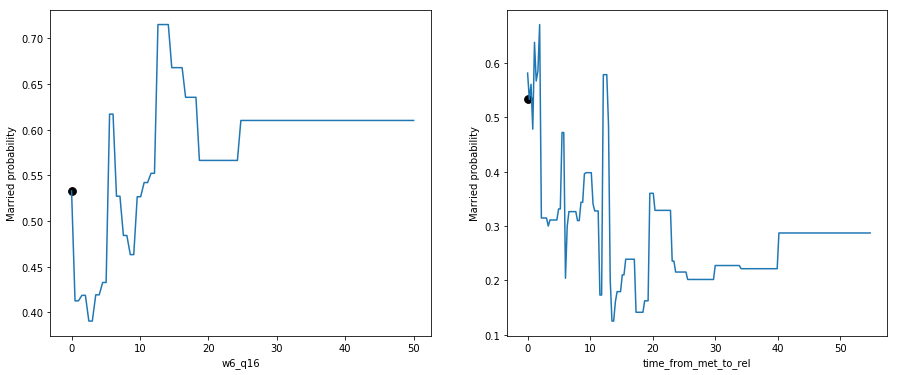

In [44]:
fig = plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plot_feature(model, sample, num_feature1, 100)

plt.subplot(1, 2, 2)
plot_feature(model, sample, num_feature2, 200)

plt.show()